# Decision Tree for Classification & Regression

A decision tree is essentially a series of if-then statements, that, when applied to a record in a data set, results in the classification of that record. Therefore, once you've created your decision tree, you will be able to run a data set through the program and get a classification for each individual record within the data set. What this means to you, as a manufacturer of quality widgets, is that the program you create from this article will be able to predict the likelihood of each user, within a data set, purchasing your finely crafted product.

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

<img src="images/2.gif">

# How decision tree works


The understanding level of Decision Trees algorithm is so easy compared with other classification algorithms. The decision tree algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.

## Decision Tree Algorithm Pseudocode

   * Place the best attribute of the dataset at the root of the tree.
   * Split the training set into subsets. Subsets should be made in such a way that each subset contains data with the same value for an attribute.
   * Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree.
 

### Decision Tree classifier
In decision trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

We continue comparing our record’s attribute values with other internal nodes of the tree until we reach a leaf node with predicted class value. As we know how the modeled decision tree can be used to predict the target class or the value. Now let’s understanding how we can create the decision tree model.

### Assumptions while creating Decision Tree

The below are the some of the assumptions we make while using Decision tree:

   * At the beginning, the whole training set is considered as the root.
   * Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
   * Records are distributed recursively on the basis of attribute values.
   * Order to placing attributes as root or internal node of the tree is done by using some statistical approach.


# How to split nodes

There are few algorithms to find optimum split. Let's look at the following to understand the mathematics behind.

### Entropy

An alternative splitting criterion for decision tree learning algorithms is *information gain*. It measures how well a particular attribute distinguishes among different target classifications. Information gain is measured in terms of the expected reduction in the entropy or impurity of the data. The entropy of a set of probabilities is:

$$H(p) = -\sum_i p_i log_2(p_i)$$

If we have a set of binary responses from some variable, all of which are positive/true/1, then knowing the values of the variable does not hold any predictive value for us, since all the outcomes are positive. Hence, the entropy is zero:

<img src="images/ent.png">

The entropy calculation tells us how much additional information we would obtain with knowledge of the variable.

So, if we have a set of candidate covariates from which to choose as a node in a decision tree, we should choose the one that gives us the most information about the response variable (*i.e.* the one with the highest entropy).

### Misclassification Rate

Alternatively, we can use the misclassification rate:

$$C(j,t) = \frac{1}{n_{jt}} \sum_{y_i: x_{ij} \gt t} I(y_i \ne \hat{y})$$

where $\hat{y}$ is the most probable class label and $n_{ij}$ is the number of observations in the data subset obtained from splitting via $j,t$.

### Gini index

The Gini index is simply the expected error rate:

$$C(j,t) = \sum_{k=1}^K \hat{\pi}_{jt}[k] (1 - \hat{\pi}_{jt}[k]) = 1 - \sum_{k=1}^K \hat{\pi}_{jt}[k]^2$$

where $\hat{\pi}_{jt}[k]$ is the probability of an observation being correctly classified as class $k$ for the data subset obtained from splitting via $j,t$ (hence, $(1 - \hat{\pi}_{jt}[k])$ is the misclassification probability).

# Implementation using scikit-learn

In [39]:
#!pip install pydotplus

In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

##                                                               Heart Disease Case Study

 Objective : Predict the presence of heart disease in a pateint. 

 Data contain
 a binary outcome HD for 454  patients who presented with chest pain.
 An outcome value of Yes indicates the presence of heart disease based on
 an angiographic test, while No means no heart disease

 
 There are 13 predictors
 including Age, Sex, Chol (a cholesterol measurement), and other heart
 and lung function measurements

 In the data, some of the predictors, such as Sex, Thal (Thallium stress test),
 and ChestPain, are qualitative


 Data Source-UCI Machine Learning Repository

 Data Description

 
 1. (age)-> age in years <br>
 2. (sex)-sex (1 = male; 0 = female) <br>
 3. (chestPain)<br>
 -- Value 1: typical angina<br>
 -- Value 2: atypical angina<br>
 -- Value 3: non-anginal pain<br>
 -- Value 4: asymptomatic <br>
 4.  (RestBP)->resting blood pressure (in mm Hg on admission to the hospital) <br>
 5.  (chol)->serum cholestoral in mg/dl <br>
 6.  (fbs)->(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
 7.  (restecg)->resting electrocardiographic results <br>
 -- Value 0: normal<br>
 -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
 -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
 8. (MaxHR)->maximum heart rate achieved <br>
 9.  (exang)->exercise induced angina (1 = yes; 0 = no) <br>
 10. (oldpeak)->ST depression induced by exercise relative to rest <br>
 11. (slope)->the slope of the peak exercise ST segment<br>
 -- Value 1: upsloping<br>
 -- Value 2: flat<br>
 -- Value 3: downsloping <br>
 12. (ca)->number of major vessels (0-3) colored by flourosopy <br>
 13. (thal)->3 = normal; 6 = fixed defect; 7 = reversable defect <br>
 14. (AHD) (the predicted attribute) ->diagnosis of heart disease (angiographic disease status) Yes/No<br>

In [41]:
# load the data
df = pd.read_csv('trainData.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes


In [42]:
df['AHD']=df['AHD'].apply(lambda x : 1 if x=='Yes' else 0)

In [43]:
#df['AHD'],_=pd.factorize(df['AHD'],sort=)

In [44]:
df.head(10)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,1
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,1
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,1
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,1
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,1
5,52,0,nonanginal,136,196,0,2,169,0,0.1,2,0.0,normal,0
6,50,1,nonanginal,140,233,0,0,163,0,0.6,2,1.0,reversable,1
7,56,0,nontypical,140,294,0,2,153,0,1.3,2,0.0,normal,0
8,58,0,typical,150,283,1,2,162,0,1.0,1,NaN,normal,0
9,67,0,nonanginal,152,277,0,0,172,0,0.0,1,1.0,normal,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        317 non-null    int64  
 1   Sex        317 non-null    int64  
 2   ChestPain  317 non-null    object 
 3   RestBP     317 non-null    int64  
 4   Chol       317 non-null    int64  
 5   Fbs        317 non-null    int64  
 6   RestECG    317 non-null    int64  
 7   MaxHR      317 non-null    int64  
 8   ExAng      317 non-null    int64  
 9   Oldpeak    317 non-null    float64
 10  Slope      317 non-null    int64  
 11  Ca         314 non-null    float64
 12  Thal       317 non-null    object 
 13  AHD        317 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 34.8+ KB


In [46]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [47]:
le.fit(df['ChestPain'])
df['ChestPain']=pd.Categorical(le.transform(df['ChestPain']))

In [48]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,1,118,149,0,2,126,0,0.8,1,3.0,normal,1
1,63,0,0,108,269,0,0,169,1,1.8,2,2.0,normal,1
2,59,1,3,160,273,0,2,125,0,0.0,1,0.0,normal,1
3,59,1,0,140,177,0,0,162,1,0.0,1,1.0,reversable,1
4,47,1,1,108,243,0,0,152,0,0.0,1,0.0,normal,1


In [49]:
le.fit(df['Thal'])
df['Thal']=pd.Categorical(le.transform(df['Thal']))

In [50]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,1,118,149,0,2,126,0,0.8,1,3.0,1,1
1,63,0,0,108,269,0,0,169,1,1.8,2,2.0,1,1
2,59,1,3,160,273,0,2,125,0,0.0,1,0.0,1,1
3,59,1,0,140,177,0,0,162,1,0.0,1,1.0,2,1
4,47,1,1,108,243,0,0,152,0,0.0,1,0.0,1,1


In [51]:
df=df.dropna()

In [52]:
# select features
y_train = df['AHD']
X_train = df.iloc[:,0:13]

In [53]:
X_train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,49,1,1,118,149,0,2,126,0,0.8,1,3.0,1
1,63,0,0,108,269,0,0,169,1,1.8,2,2.0,1
2,59,1,3,160,273,0,2,125,0,0.0,1,0.0,1
3,59,1,0,140,177,0,0,162,1,0.0,1,1.0,2
4,47,1,1,108,243,0,0,152,0,0.0,1,0.0,1


In [54]:
y_train[:10]

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     0
9     0
10    1
Name: AHD, dtype: int64

In [55]:
?tree.DecisionTreeClassifier

In [56]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

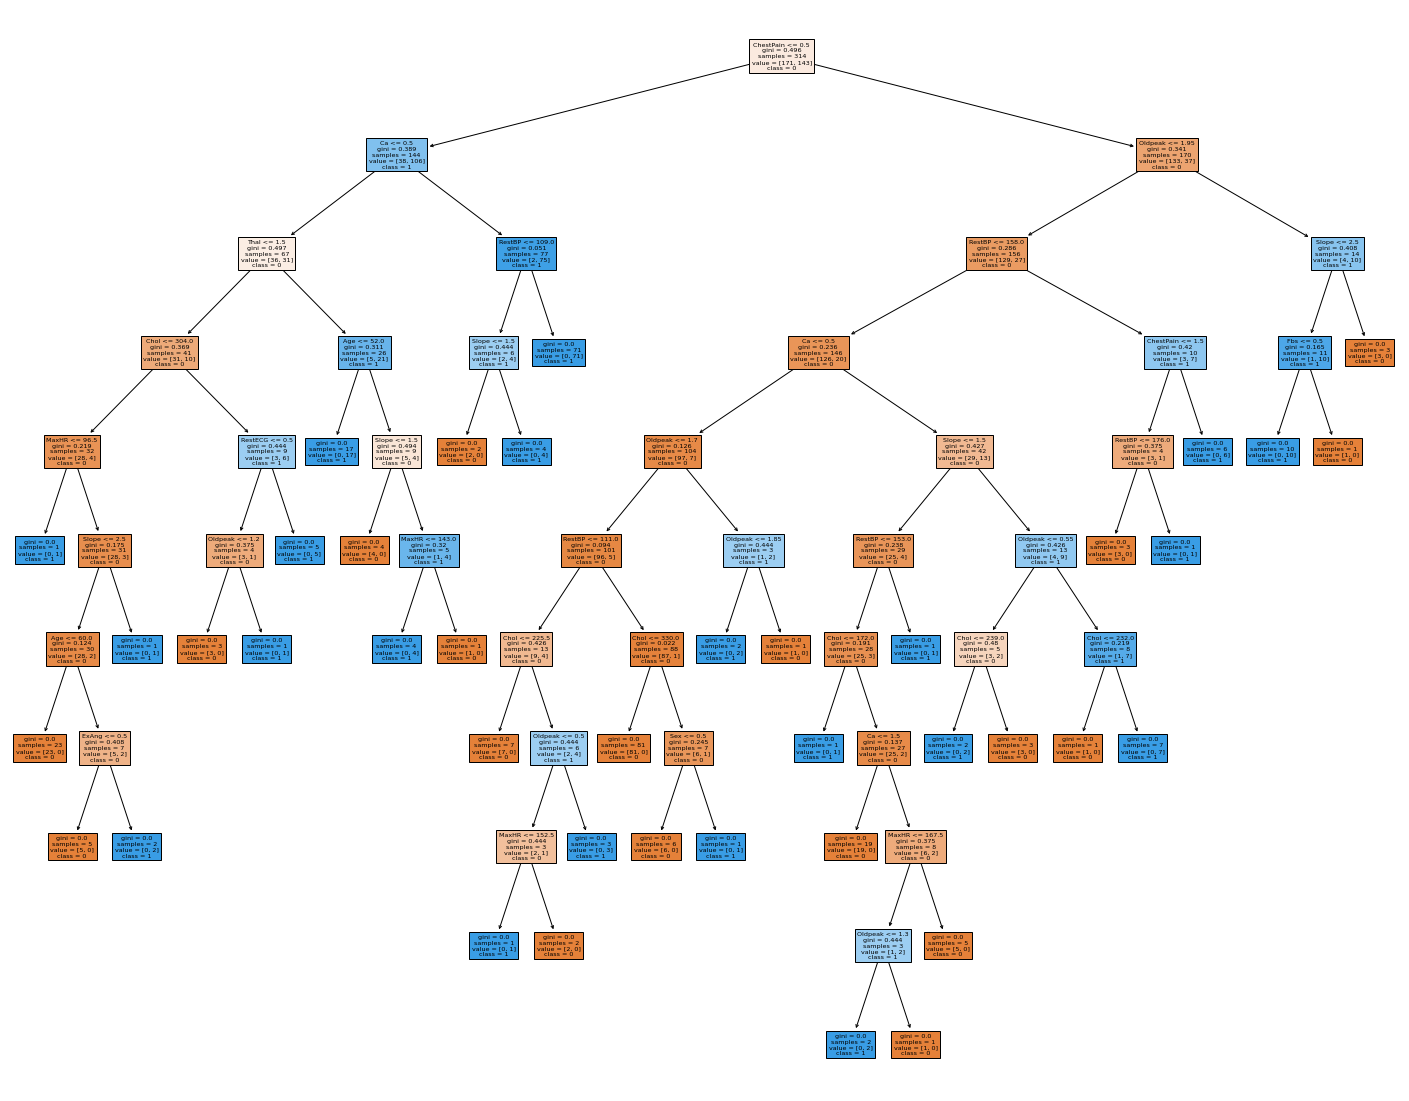

In [57]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)

In [58]:
y_train_pred_prob = dtree.predict_proba(X_train)
y_train_pred_class= y_train_pred_prob[:,1]>0.5
pd.crosstab(y_train,y_train_pred_class)

col_0,False,True
AHD,,
0,171,0
1,0,143


In [59]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=10,max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

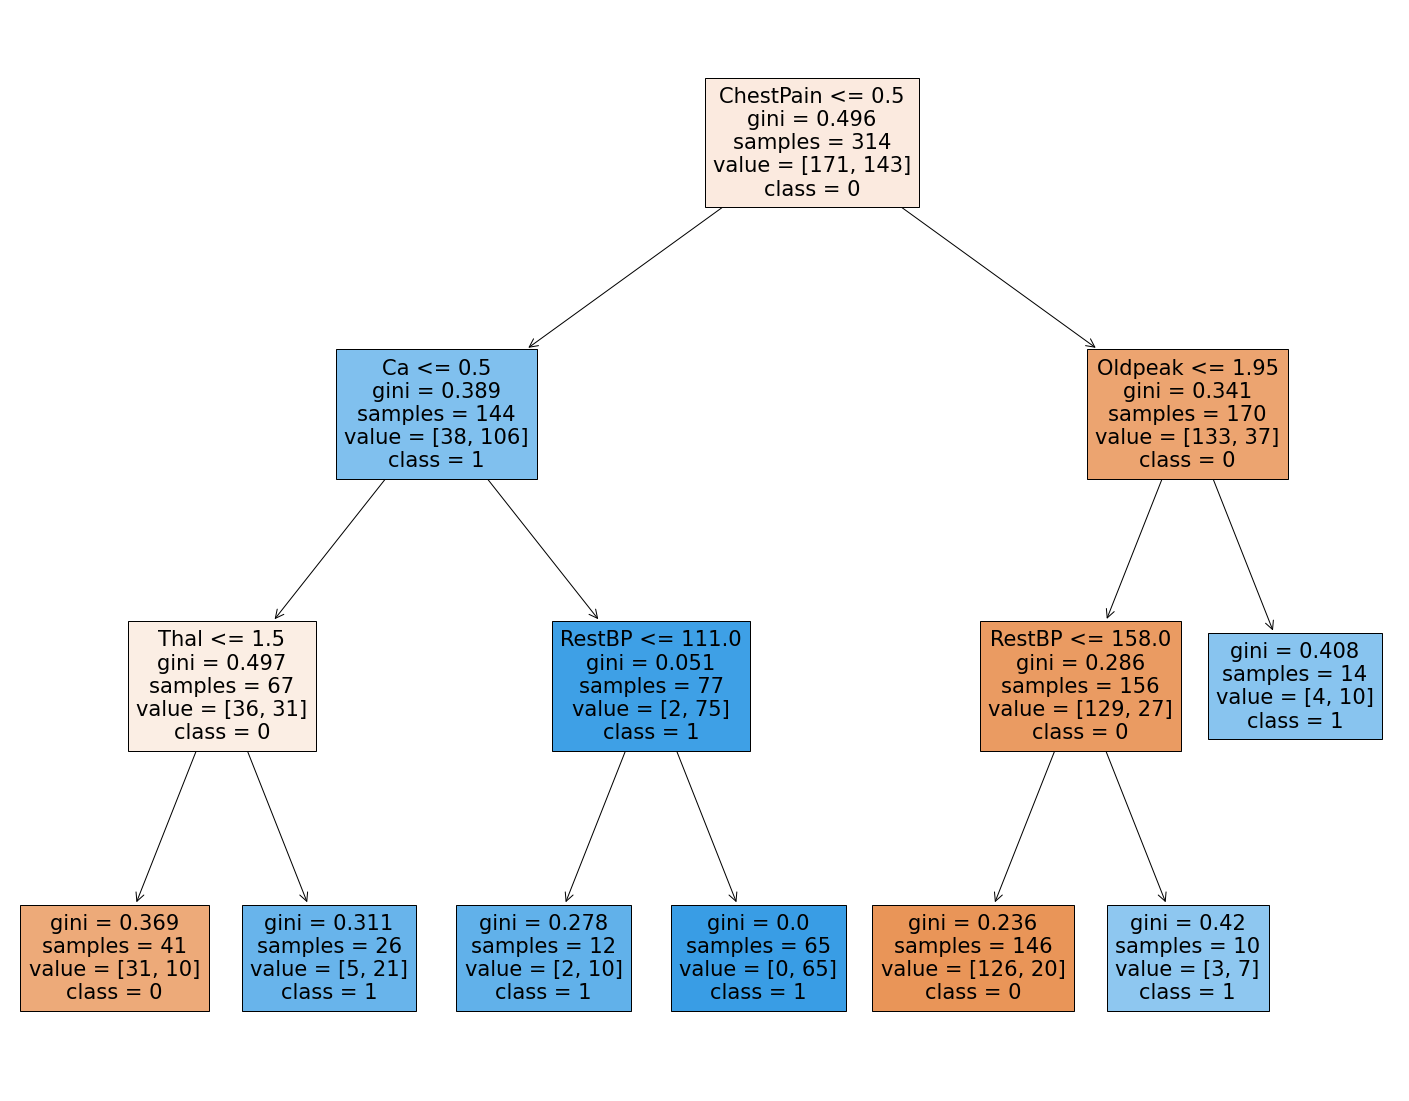

In [60]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)

In [61]:
y_train_pred_prob = dtree.predict_proba(X_train)
y_train_pred_class= y_train_pred_prob[:,1]>0.5
pd.crosstab(y_train,y_train_pred_class)

col_0,False,True
AHD,,
0,157,14
1,30,113


In [62]:
(157+113)/(157+14+30+114)

0.8571428571428571

In [63]:
#y_train_pred_prob[0]

In [64]:
#y_train[1]

In [65]:
#y_train_pred_prob[:5,1]

In [66]:
y_train_pred = dtree.predict(X_train)
y_train_pred[:5]

array([0, 1, 1, 1, 0])

In [67]:
pd.crosstab(y_train,y_train_pred)

col_0,0,1
AHD,,
0,157,14
1,30,113


In [68]:
# Predictions on Test Data Set
# load the data
df_test = pd.read_csv('testData.csv')
df_test.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        137 non-null    int64  
 1   Sex        137 non-null    int64  
 2   ChestPain  137 non-null    object 
 3   RestBP     137 non-null    int64  
 4   Chol       137 non-null    int64  
 5   Fbs        137 non-null    int64  
 6   RestECG    137 non-null    int64  
 7   MaxHR      137 non-null    int64  
 8   ExAng      137 non-null    int64  
 9   Oldpeak    137 non-null    float64
 10  Slope      137 non-null    int64  
 11  Ca         137 non-null    int64  
 12  Thal       137 non-null    object 
 13  AHD        137 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 15.1+ KB


In [70]:
df_test['AHD']=df_test['AHD'].apply(lambda x : 1 if x=='Yes' else 0)
#df_test['AHD'],_=pd.factorize(df_test['AHD'],sort=False)

le.fit(df_test['ChestPain'])
df_test['ChestPain']=pd.Categorical(le.transform(df_test['ChestPain']))

le.fit(df_test['Thal'])
df_test['Thal']=pd.Categorical(le.transform(df_test['Thal']))
df_test=df_test.dropna()

df_test.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,1,130,250,0,0,187,0,3.5,3,0,1,0
1,62,0,0,140,268,0,2,160,0,3.6,3,2,1,1
2,53,1,0,140,203,1,2,155,1,3.1,3,0,2,1
3,57,1,0,140,192,0,0,148,0,0.4,2,0,0,0
4,56,1,1,130,256,1,2,142,1,0.6,2,1,0,1


In [71]:
# select features
y_test = df_test['AHD']
X_test = df_test.iloc[:,0:13]

In [72]:
y_test_pred_prob = dtree.predict_proba(X_test)
y_test_pred_prob[10]

array([0.8630137, 0.1369863])

In [73]:
y_test_pred_class = dtree.predict(X_test)

In [74]:
#pd.crosstab(y_test,y_test_pred_prob[:,1]>0.5)
pd.crosstab(y_test,y_test_pred_class)

col_0,0,1
AHD,,
0,64,14
1,8,51


In [75]:
(64+51)/(14+64+51+8)

0.8394160583941606

## Practice : Descision Tree excercise on IRIS dataset

In [76]:
# load the iris data
df = pd.read_csv('iris.csv')
df['species_label'], _ = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [77]:
# select features
y = df['species_label']
X = df[['petal_length', 'petal_width']]

In [78]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

#### Train the model and make predictions

Note we didn't have to standardize the data to use a decision tree.

In [79]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini',random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [80]:
y_pred_prob = dtree.predict_proba(X_test)
y_pred_prob[24]

array([0. , 0.5, 0.5])

In [81]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
y_pred[24]

1

#### Evaluate the model's performance

Including the tree's axis-parallel decision boundaries and how the tree splits

In [82]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.96


In [83]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
species_label,,,
0,16,0,0
1,0,17,1
2,0,1,10


In [84]:
43/45

0.9555555555555556

### Visualization

For visualizing decision tree splits I am creating **plot_decision()** function below using matplotlib. If you dont understand the implementation completely that's fine. It is just for the understanding.

In [85]:
from matplotlib.colors import ListedColormap


def plot_decision(X, y, classifier, test_idx=None, resolution=0.02, figsize=(8,8)):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('#cc0000', '#003399', '#00cc00', '#999999', '#66ffff')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # get dimensions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    xmin = xx1.min()
    xmax = xx1.max()
    ymin = xx2.min()
    ymax = xx2.max()
    
    # create the figure
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    # plot the decision surface
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap, zorder=1)
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.6, 
                   c=cmap(idx),
                   edgecolor='black',
                   marker='o',#markers[idx],
                   s=50,
                   label=cl,
                   zorder=3)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='w',
                   alpha=1.0,
                   edgecolor='black',
                   linewidths=1,
                   marker='o',
                   s=150, 
                   label='test set',
                   zorder=2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


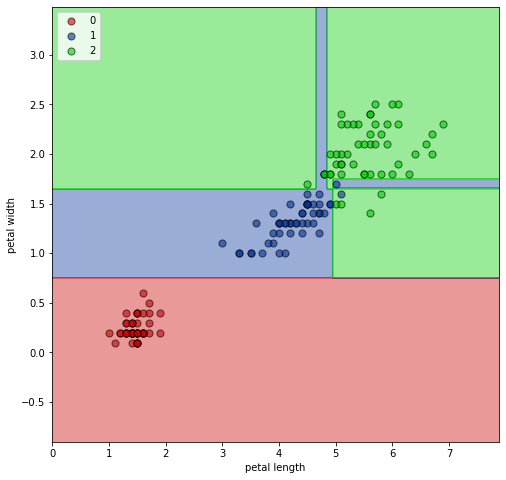

In [86]:
# visualize the model's decision regions to see how it separates the samples
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined, y=y_combined, classifier=dtree)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


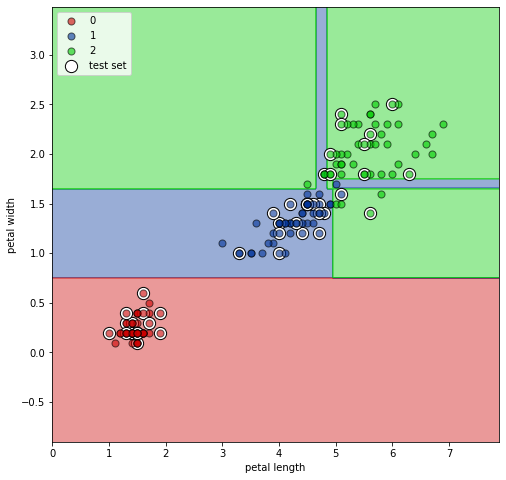

In [87]:
# same thing, but this time identify the points that constituted the test data set
test_idx = range(len(y_train), len(y_combined))
plot_decision(X=X_combined, y=y_combined, classifier=dtree, test_idx=test_idx)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show();


### Decision Tree Algorithm Advantages and Disadvantages

##### Advantages:

   * Decision Trees are easy to explain. It results in a set of rules.
   * It follows the same approach as humans generally follow while making decisions.
   * Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
   * The Number of hyper-parameters to be tuned is almost null.


##### Disadvantages:

   * There is a high probability of overfitting in Decision Tree.
   * Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
   * Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
   * Calculations can become complex when there are many class labels.

## Decision Tree for Regression Problem- ie. when the target variable is continuous

In [88]:
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
Y = dataset.target

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [89]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [90]:
dataset.values

<function Bunch.values>

In [91]:
X=pd.DataFrame(X)
X
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [92]:
Y=pd.DataFrame(Y)
Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=3, test_size=0.2)

In [94]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_tree = DecisionTreeRegressor(max_depth=3)

In [95]:
bag_tree.fit(X_train, y_train)
bag_tree.score(X_test, y_test)

0.7829111962667628

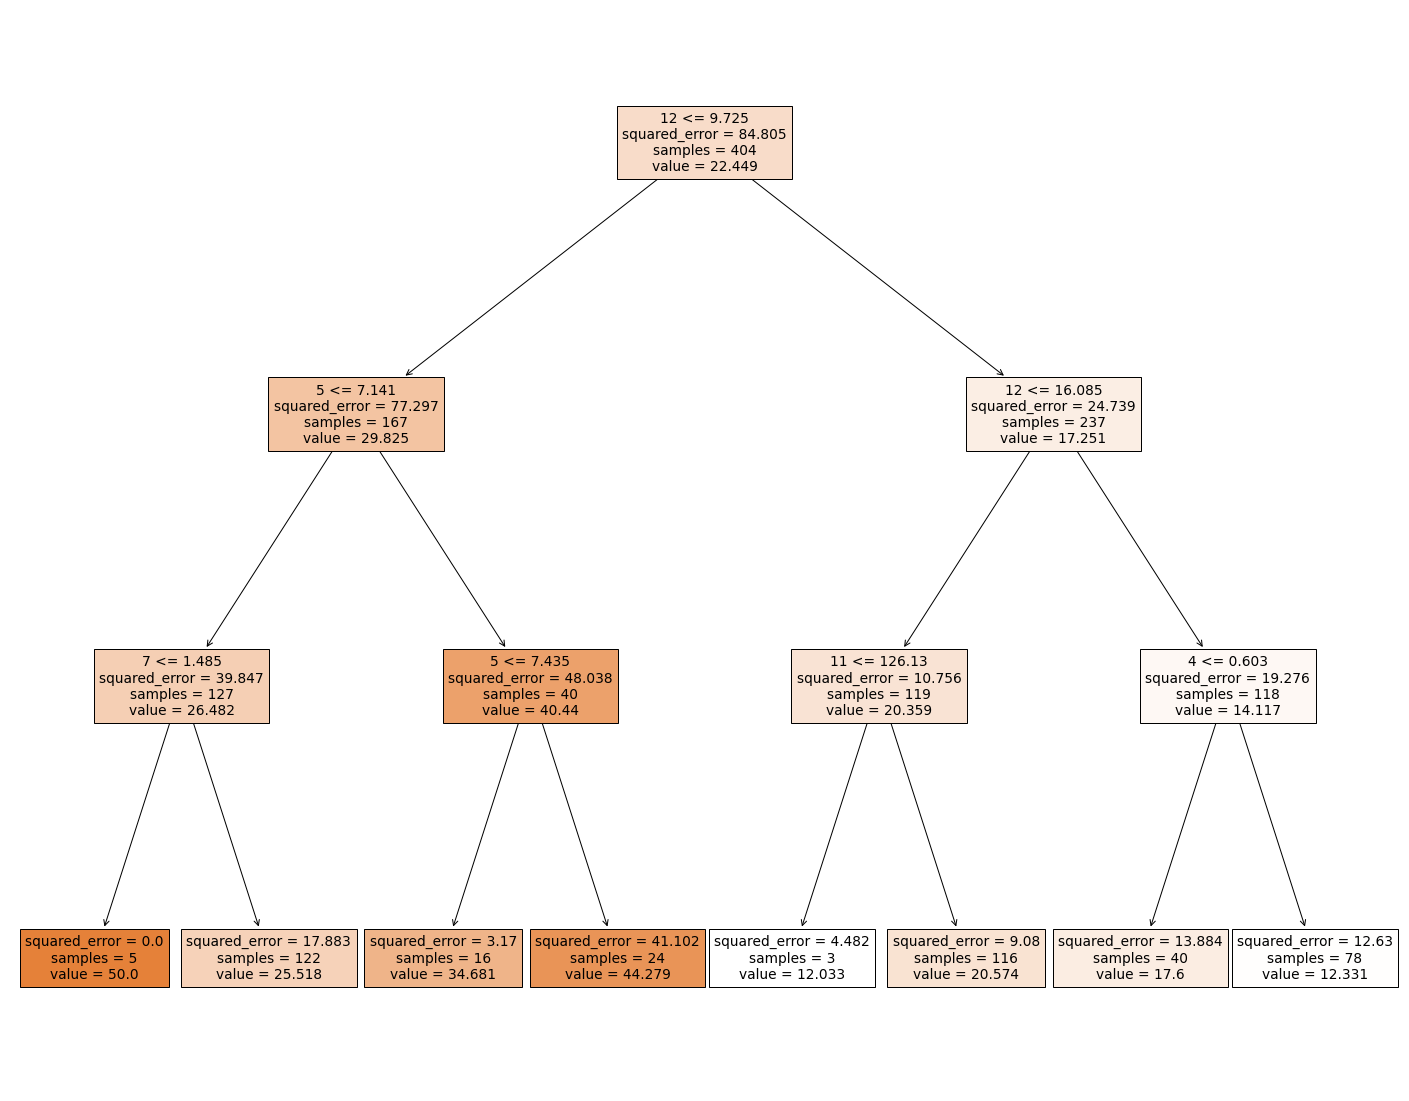

In [96]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(bag_tree,feature_names=X_train.columns,filled=True)

## Reference Material
* https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

* http://www.r2d3.us/visual-intro-to-machine-learning-part-1/